In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import dynadojo.dynadojo as dd
import numpy as np

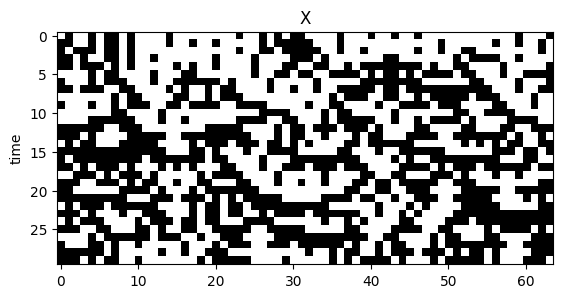

In [17]:
latent_dim = 3
embed_dim = 64
timesteps = 30
n = 1000
system = dd.systems.CASystem(latent_dim, embed_dim, mutation_p=0)
x0 = system.make_init_conds(n=n)
x = system.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
dd.utils.ca.plot([x], labels=["X"])

In [14]:
model = dd.baselines.CNN(embed_dim, timesteps, max_control_cost=0)
model.fit(x, epochs=1000)

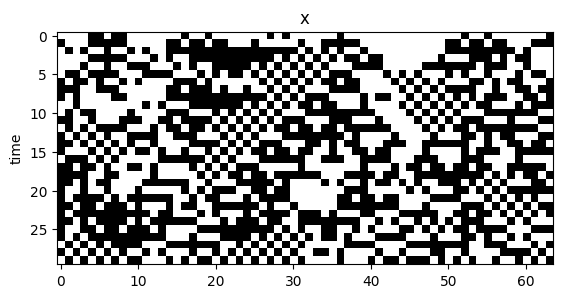

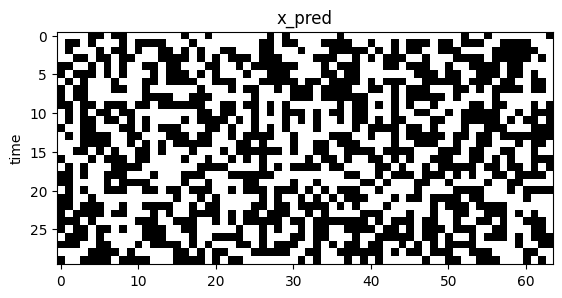

In [15]:
x_pred = model.predict(x0, timesteps=timesteps)
dd.utils.ca.plot([x, x_pred], labels=["x", "x_pred"])